In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

In [2]:
# Step 1: Input data for hours studied (x1), practice exams (x2), and pass/fail outcomes (y)
def create_data():
    """
    Create a DataFrame containing the data for hours studied, practice exams, and pass/fail outcomes.
    
    Returns:
        pd.DataFrame: The input dataset for logistic regression.
    """
    data = {'Hours Studied (x1)': [2, 4, 5, 6, 8],
            'Practice Exams (x2)': [1, 2, 2, 3, 4],
            'Pass (y)': [0, 0, 1, 1, 1]}
    return pd.DataFrame(data)

# Step 2: Design matrix X and response vector y
def prepare_data(df):
    """
    Prepare the design matrix X and response vector y from the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the input data.
    
    Returns:
        tuple: Design matrix X and response vector y.
    """
    X = np.column_stack((np.ones(df.shape[0]), df['Hours Studied (x1)'], df['Practice Exams (x2)']))
    y = df['Pass (y)'].values
    return X, y

# Step 3: Logistic function for predicted probabilities
def logistic_function(X, beta):
    """
    Apply the logistic function (sigmoid) to compute probabilities.
    
    Args:
        X (np.ndarray): Design matrix.
        beta (np.ndarray): Coefficients of the logistic regression model.
    
    Returns:
        np.ndarray: Predicted probabilities.
    """
    return expit(np.dot(X, beta))

# Step 4: Create decision boundary grid
def create_decision_boundary(X1_range, X2_range, beta):
    """
    Create the decision boundary by calculating the logistic regression predictions over a grid.

    Args:
        X1_range (np.ndarray): Range of values for x1 (hours studied).
        X2_range (np.ndarray): Range of values for x2 (practice exams).
        beta (np.ndarray): Coefficients of the logistic regression model.
    
    Returns:
        tuple: Mesh grid (X1, X2) and decision boundary (Z).
    """
    X1, X2 = np.meshgrid(X1_range, X2_range)
    Z = logistic_function(np.column_stack((np.ones(X1.ravel().shape[0]), X1.ravel(), X2.ravel())), beta)
    Z = Z.reshape(X1.shape)
    return X1, X2, Z

# Step 5: Plot the data and decision boundary
def plot_data_and_boundary(df, X1, X2, Z):
    """
    Plot the dataset and decision boundary for logistic regression.

    Args:
        df (pd.DataFrame): Input dataset.
        X1 (np.ndarray): Mesh grid for x1 (hours studied).
        X2 (np.ndarray): Mesh grid for x2 (practice exams).
        Z (np.ndarray): Decision boundary values for the mesh grid.
    """
    plt.figure(figsize=(10, 6))

    # Contour plot for the decision boundary (probability = 0.5 line)
    plt.contourf(X1, X2, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'green'])

    # Students who failed
    plt.scatter(df[df['Pass (y)'] == 0]['Hours Studied (x1)'],
                df[df['Pass (y)'] == 0]['Practice Exams (x2)'], 
                color='red', label='Fail (y=0)', s=100)
    # Students who passed
    plt.scatter(df[df['Pass (y)'] == 1]['Hours Studied (x1)'],
                df[df['Pass (y)'] == 1]['Practice Exams (x2)'], 
                color='green', label='Pass (y=1)', s=100)

    # Labels, title, and legend
    plt.title("Logistic Regression: Hours Studied vs Practice Exams\nwith Decision Boundary", fontsize=14)
    plt.xlabel("Hours Studied (x1)", fontsize=12)
    plt.ylabel("Practice Exams (x2)", fontsize=12)
    plt.legend()
    plt.show()

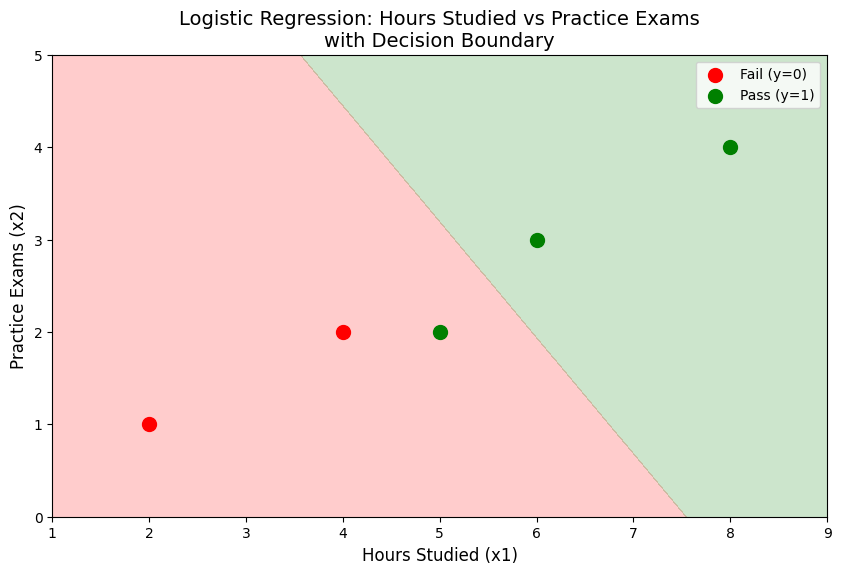

In [3]:
# Step 1: Create the data
df_logistic = create_data()

# Step 2: Prepare the design matrix and response vector
X, y = prepare_data(df_logistic)

# Step 3: Coefficients for logistic regression (precomputed)
beta_hat = np.array([-9.28, 1.23, 0.98])

# Step 4: Generate decision boundary grid
x1_range = np.linspace(df_logistic['Hours Studied (x1)'].min() - 1, df_logistic['Hours Studied (x1)'].max() + 1, 200)
x2_range = np.linspace(df_logistic['Practice Exams (x2)'].min() - 1, df_logistic['Practice Exams (x2)'].max() + 1, 200)
X1, X2, Z = create_decision_boundary(x1_range, x2_range, beta_hat)

# Step 5: Plot the data and decision boundary
plot_data_and_boundary(df_logistic, X1, X2, Z)